<a href="https://colab.research.google.com/github/CM-007/DS_Python_SL/blob/main/Normal_Distribution_Example_stockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import **

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# **Load data **

In [2]:
beml =pd.read_csv('/content/BEML.csv')
glaxo=pd.read_csv('/content/GLAXO.csv')

In [3]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


# Extract and Create usefull columns data set

In [6]:
# Extract and Create usefull columns data set
beml = beml[['Date','Close']]
glaxo = glaxo[['Date','Close']]

In [7]:
beml

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
glaxo

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


# Cheacking Data types of the columns

In [9]:
# Data types of the columns
beml.dtypes

Date      object
Close    float64
dtype: object

In [10]:
glaxo.dtypes

Date      object
Close    float64
dtype: object

#Create Date column as a Index

In [13]:
# It will ensure that the dataset is an *ascending order*
beml=beml.set_index(pd.DatetimeIndex(beml['Date']))
glaxo=glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))

In [14]:
beml.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


#Visulization

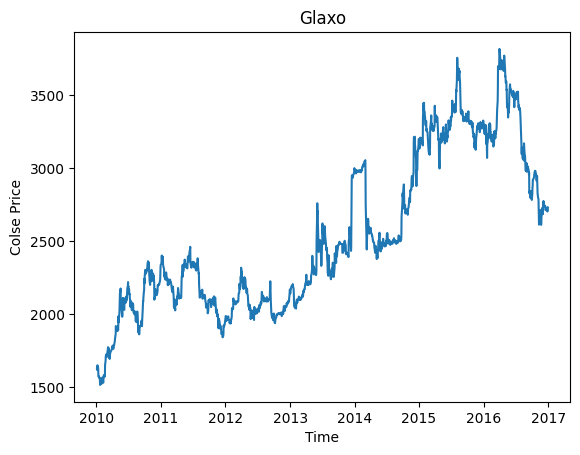

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.plot(glaxo.Close)
plt.xlabel('Time')
plt.ylabel('Colse Price')
plt.title('Glaxo')
plt.show()

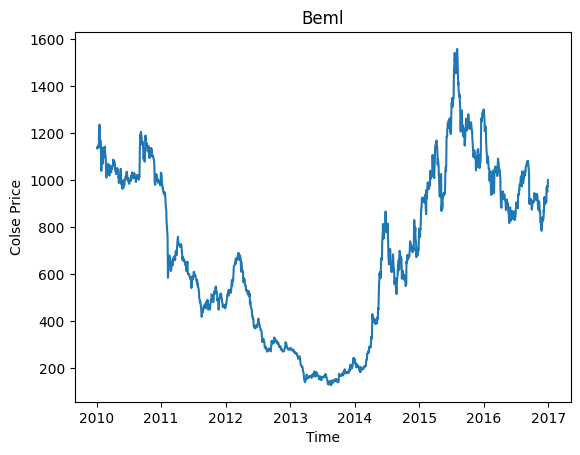

In [19]:
plt.plot(beml.Close)
plt.xlabel('Time')
plt.ylabel('Colse Price')
plt.title('Beml')
plt.show()

#Gain Column Added

In [29]:
beml['gain'] =beml.Close.pct_change(periods=1)

glaxo['gain'] =glaxo['Close'].pct_change(periods=1)

In [30]:
beml

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,NaN
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


# Remove NA values

In [31]:
beml = beml.dropna()
glaxo = glaxo.dropna()

In [33]:
beml

,Date,Close,gain
Date,,,
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
2010-01-12,2010-01-12,1143.65,0.005849
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


Text(0, 0.5, 'Gain')

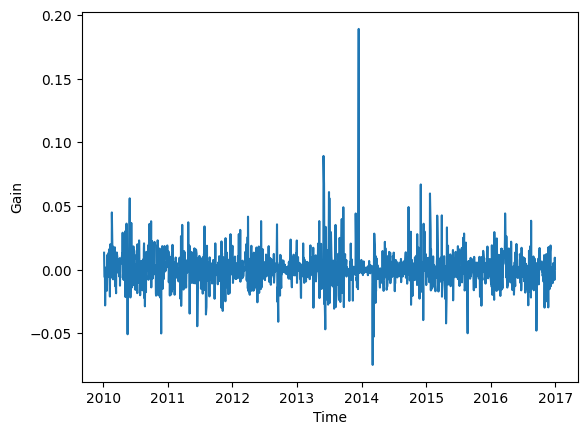

In [36]:
plt.plot(glaxo.gain)
plt.xlabel('Time')
plt.ylabel('Gain')

Text(0, 0.5, 'Gain')

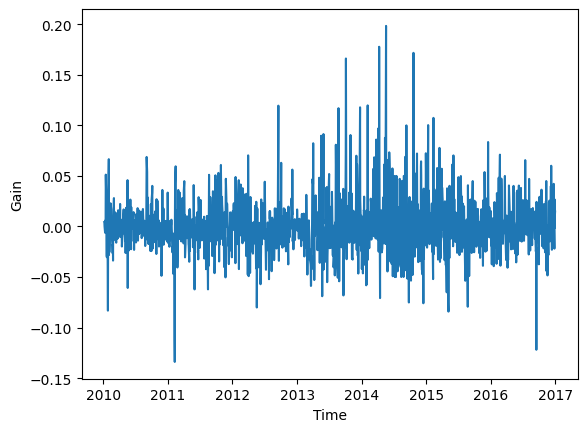

In [37]:
plt.plot(beml.gain)
plt.xlabel('Time')
plt.ylabel('Gain')

#Density Plot

<Axes: xlabel='gain', ylabel='Density'>

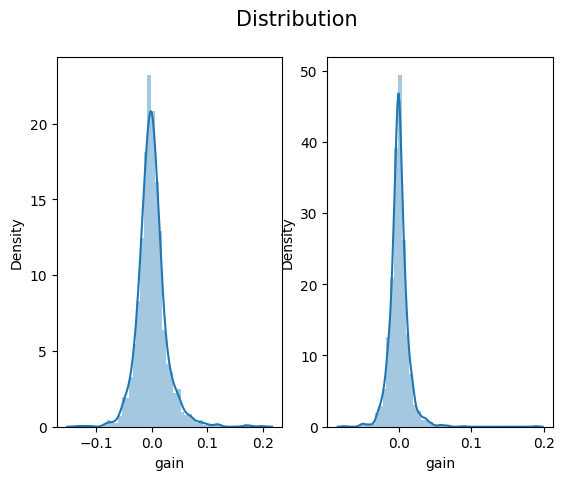

In [41]:
plt.suptitle('Distribution',fontsize=15)
plt.subplot(1,2,1)
sn.distplot(beml.gain,label='Beml')

plt.subplot(1,2,2)
sn.distplot(glaxo.gain,label='Glaxo')